In [229]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

### Descripción de las variables

| VARIABLE | DESCRIPTION                                                           |
|----------|-----------------------------------------------------------------------|
| CRIM     | per capita crime rate by town                                         |
| ZN       | proportion of residential land zoned for lots over 25,000 sq.ft.      |
| INDUS    | proportion of non-retail business acres per town                      |
| CHAS     | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) |
| NOX      | nitric oxides concentration (parts per 10 million)                    |
| RM       | average number of rooms per dwelling                                  |
| AGE      | proportion of owner-occupied units built prior to 1940                |
| DIS      | weighted distances to five Boston employment centres                  |
| RAD      | index of accessibility to radial highways                             |
| TAX      | full-value property-tax rate per   10,000 dollars                              |
| PTRATIO  | pupil-teacher ratio by town                                           |
| B        | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town        |
| LSTAT    | % lower status of the population                                      |
| MEDV     | Median value of owner-occupied homes in $1000's                       |

In [185]:
housingDF

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
501,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
502,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
503,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [15]:
housingDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     505 non-null    float64
 1   ZN       505 non-null    float64
 2   INDUS    505 non-null    float64
 3   CHAS     505 non-null    int64  
 4   NOX      505 non-null    float64
 5   RM       505 non-null    float64
 6   AGE      505 non-null    float64
 7   DIS      505 non-null    float64
 8   RAD      505 non-null    int64  
 9   TAX      505 non-null    float64
 10  PTRATIO  505 non-null    float64
 11  B        505 non-null    float64
 12  LSTAT    505 non-null    float64
 13  MEDV     505 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


In [20]:
housingDF.isnull().values.any()

False

In [21]:
housingDF.isna().values.any()

False

In [22]:
#Duplicados
housingDF.loc[housingDF.duplicated()]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV


> No hay valores nulos , NANs o ducplicados en el dataset.  
> Todas las variables son númericas, 11 son de tipo float64 y 2 int64.

In [24]:
housingDF.CHAS.unique().tolist()

[0, 1]

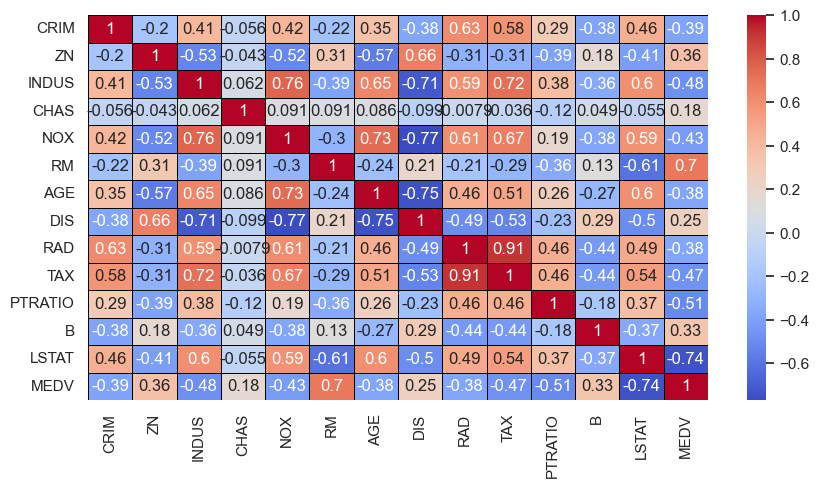

In [55]:
# De forma exploratoria realizamos un heatmap para observar la relación de las variables de forma inicial
fig, ax = plt.subplots(figsize=(10,5)) 
sns.heatmap(housingDF.corr(), annot=True, linewidths=.5, cmap="coolwarm", linecolor='black')

# Mostramos el gráfico
plt.show()

> El target del conjunto de datos es MEDV(valor medio de las viviendas ocupadas por sus propietarios en miles de $ dolares. Existen dos atributos que se relacionan de forma más pronunciada son:

> * LSTAT(-0.74): en este caso tiene una relación lineal negativa. Entre menos es el % de status más alto es el precio de la vivienda.
> * RM (0.7): en este caso tiene una relacion lineal positiva. A mayor número de habitaciones más alto sera el precio de la vivienda.

<Figure size 800x500 with 0 Axes>

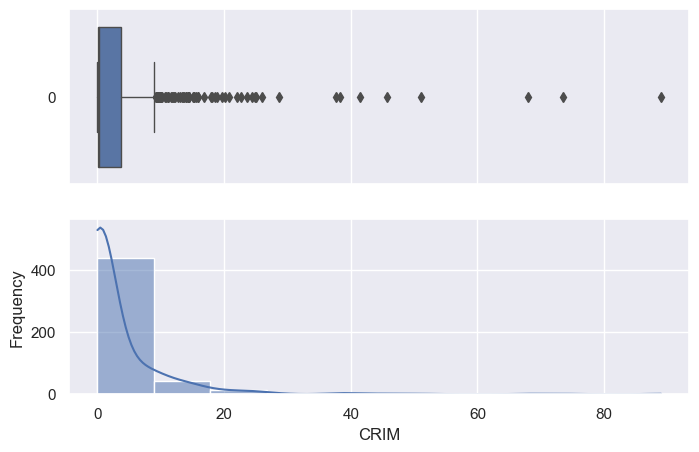

<Figure size 800x500 with 0 Axes>

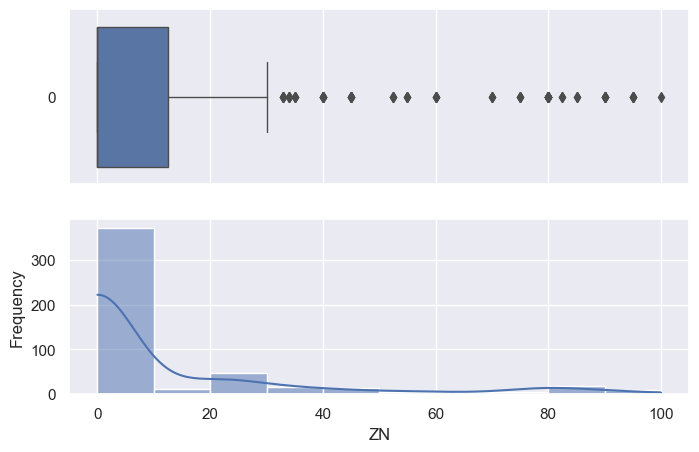

<Figure size 800x500 with 0 Axes>

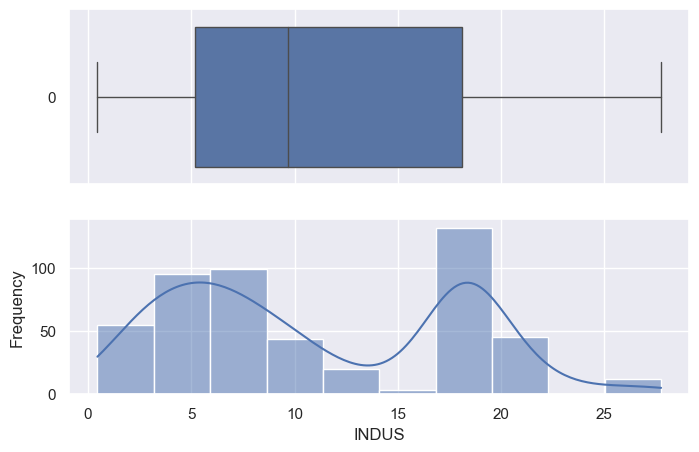

<Figure size 800x500 with 0 Axes>

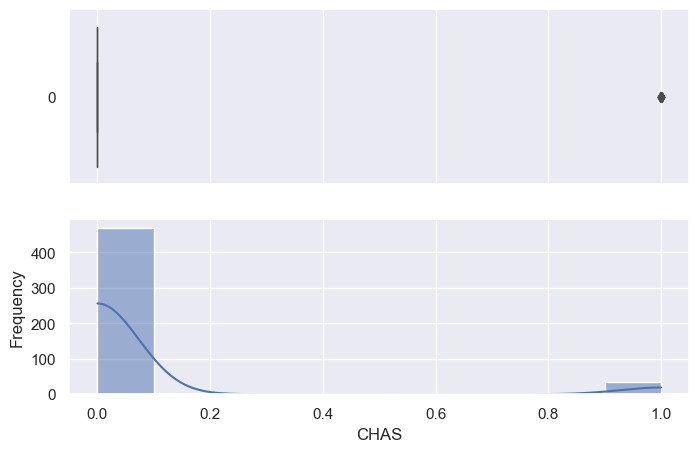

<Figure size 800x500 with 0 Axes>

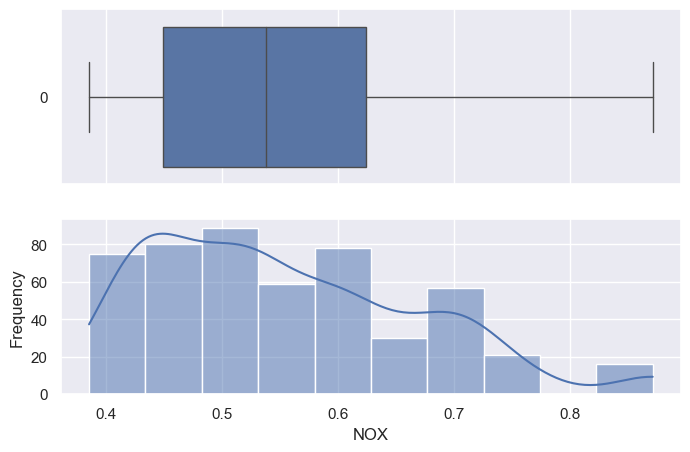

<Figure size 800x500 with 0 Axes>

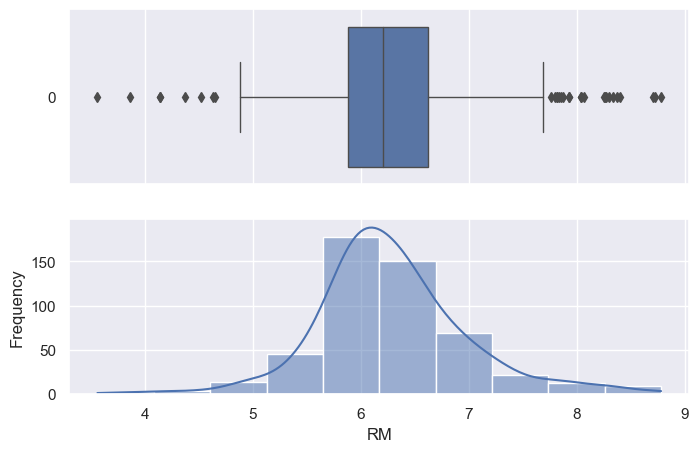

<Figure size 800x500 with 0 Axes>

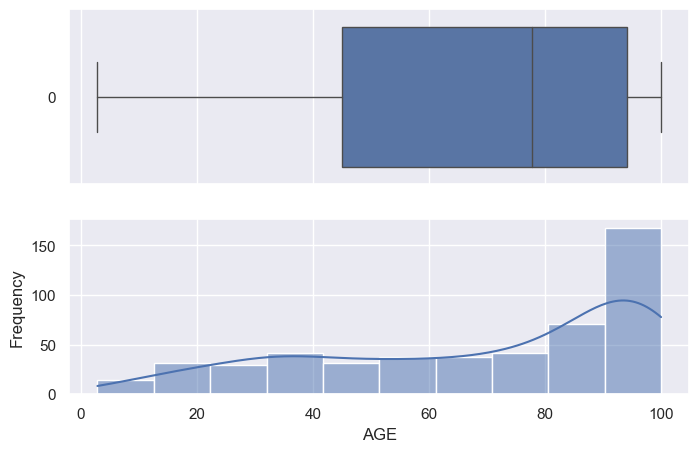

<Figure size 800x500 with 0 Axes>

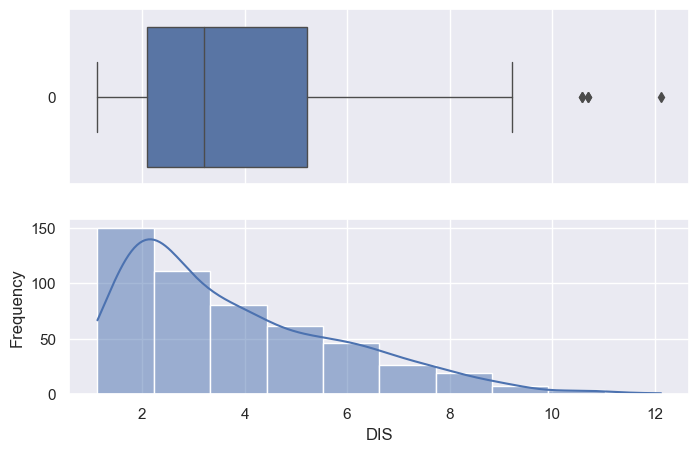

<Figure size 800x500 with 0 Axes>

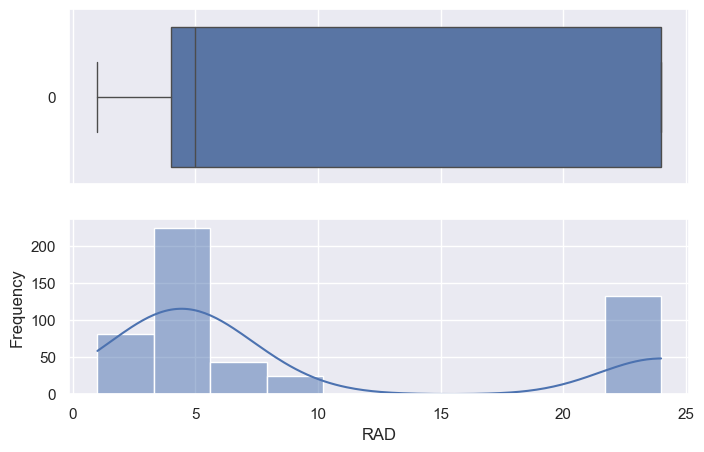

<Figure size 800x500 with 0 Axes>

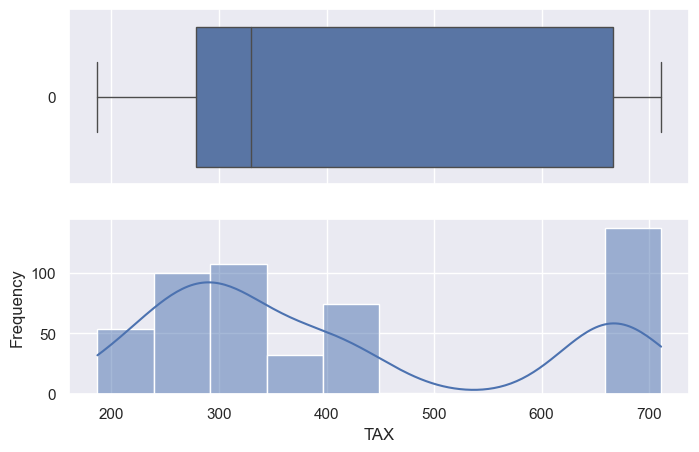

<Figure size 800x500 with 0 Axes>

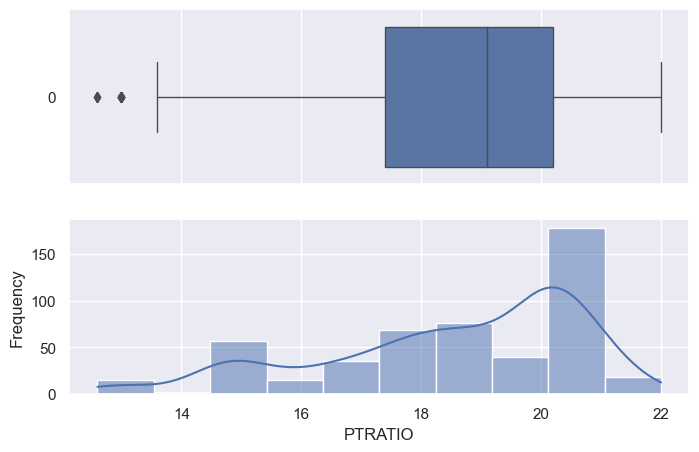

<Figure size 800x500 with 0 Axes>

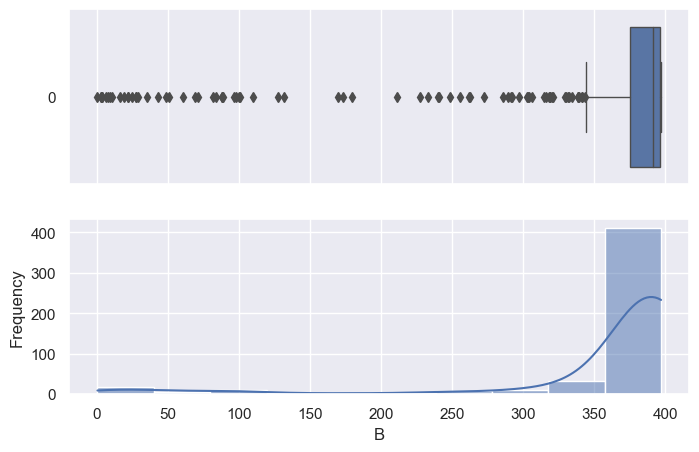

<Figure size 800x500 with 0 Axes>

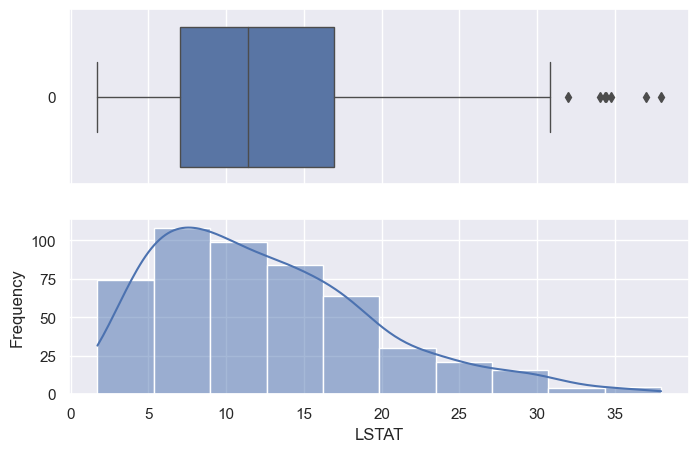

<Figure size 800x500 with 0 Axes>

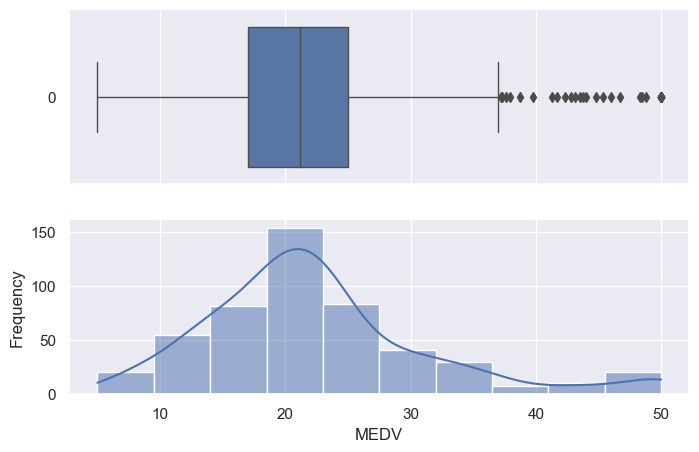

In [33]:
#Graficamos los datos antes de separarlos y observar sus distribuciones de forma gráfica

for i in housingDF.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(housingDF[i],  ax=ax_box , linewidth= 1.0,orient='h')
    sns.histplot(housingDF[i], ax=ax_hist , bins = 10,kde=True)

# Exercici 1

* Parteix el conjunt de dades adjunt en train i test. Estudia els dos conjunts per separat, a nivell descriptiu. 

* També adjunt trobaràs una descripció de les diferents variables del dataset.

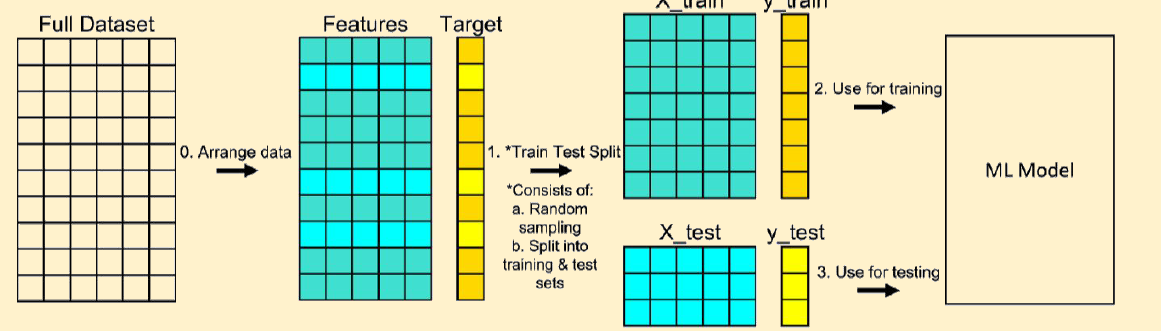

In [61]:
#Divimos las features y el target. El target sera: MEDV, valor medio de las viviendas ocupadas por sus propietarios en miles de dólares
#Es buena practica poner en mayuscula los features y en minuscula el target
X = housingDF.drop(['MEDV'], axis=1)
y = housingDF[['MEDV']]

In [62]:
#Dividimos en train y test, en este caso utilizaremos (75% -25%) respectivamente
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

#Unir feature y target de train y de test
housingDF_train = pd.concat([X_train, y_train], axis=1)  #Conjunto de train
housingDF_test = pd.concat([X_test, y_test], axis=1)     #Conjunto de test

In [63]:
# Empezamos analizando la muestra que tiene cada uno de los sets
print(housingDF_train.shape)
print('********')
print(housingDF_test.shape)

(378, 14)
********
(127, 14)


> De las 505 filas que se tenian al inicio, ahora se han divido en:
> * 378 para el train (75%)
> * 127 para el test  (25%)

### Comparación de % de variación de medias y desviación std entre Xtrain y yTest

In [136]:
# Comparación de los sets, me parece interesante también compararlos, por lo cual se realizara el calculo y se mostrara en la misma tabla 
medias= pd.DataFrame({'trainX_media': housingDF_train.mean(),
                      '% Variación': (housingDF_test.mean()  / ( housingDF_train.mean() )-1)*100, #   de variación entre train y test
                      'test_y_media':housingDF_test.mean() }).round(2)

medias

,trainX_media,% Variación,test_y_media
CRIM,3.86,-24.93,2.90
ZN,10.89,16.66,12.71
INDUS,11.26,-3.81,10.83
CHAS,0.07,-11.81,0.06
NOX,0.56,-0.90,0.55
RM,6.26,1.71,6.36
AGE,68.57,0.09,68.63
DIS,3.77,2.28,3.86
RAD,9.68,-4.56,9.24
TAX,410.83,-2.29,401.42


In [141]:
# Comparación de los sets, me parece interesante también compararlos, por lo cual se realizara el calculo y se mostrara en la misma tabla (desviación std) 
std= pd.DataFrame({'trainX_std': housingDF_train.std(),
                      '% Variación': (housingDF_test.std()  / ( housingDF_train.std() )-1)*100, #   de variación entre train y test
                      'test_y_std':housingDF_test.std() }).round(2)

std

,trainX_std,% Variación,test_y_std
CRIM,9.46,-43.83,5.31
ZN,23.26,1.52,23.62
INDUS,6.90,-2.24,6.74
CHAS,0.26,-5.42,0.24
NOX,0.12,3.31,0.12
RM,0.67,17.05,0.79
AGE,27.87,4.72,29.19
DIS,2.05,11.88,2.29
RAD,8.83,-5.28,8.36
TAX,170.93,-5.19,162.05


#### Gráficos de comparación de % de variación de medias y desviación std entre Xtrain y yTest

<Axes: title={'center': 'Std'}>

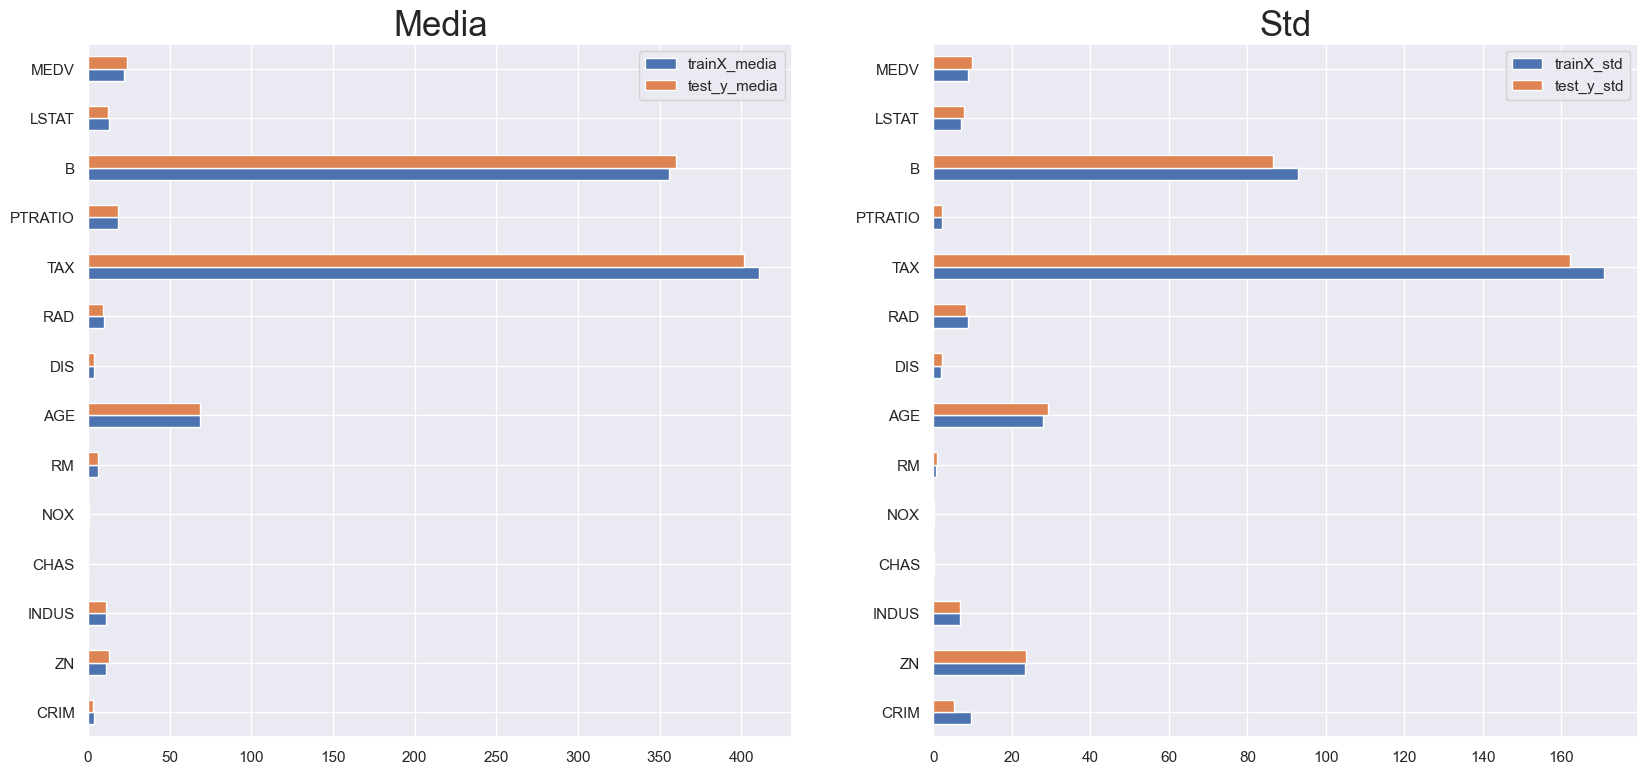

In [181]:
data_medias = medias[["trainX_media", "test_y_media"]]
data_std = std[["trainX_std", "test_y_std"]]

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(20, 9))
axs = axs.flat
axs[0].set_title("Media", fontsize = 25)
data_medias.plot(kind='barh', rot=0,ax=axs[0])
axs[1].set_title("Std", fontsize = 25)
data_std.plot(kind='barh', rot=0,ax=axs[1])

> Las gráficas de las medias y desviación std parecen estar muy igualadas en general. A excepción de:
>* MEDIAS: B, TAX
>* STD: B, TAX, AGE, RM, CRIM
    
Para observar mejor estas diferencias se realiza el gráfico del % de variación.

Text(0, 0.5, '% de Variación')

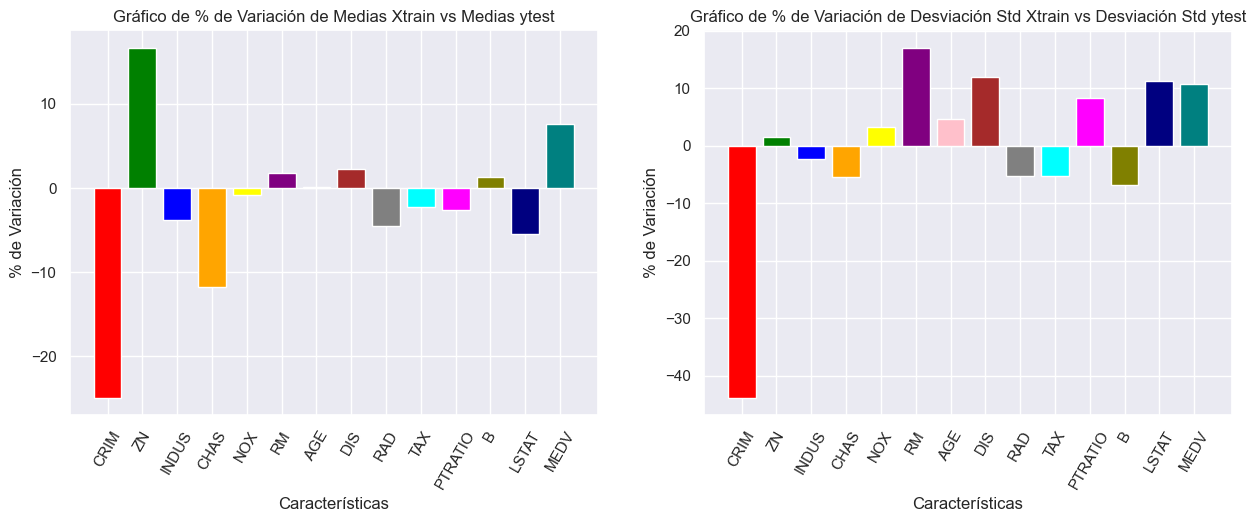

In [149]:
# Configuración de los subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Gráfica de % variación de medias (train vs test)
colors = ['red', 'green', 'blue', 'orange', 'yellow', 'purple', 'pink', 'brown', 'gray', 'cyan', 'magenta', 'olive', 'navy', 'teal']
axs[0].bar(medias.index, medias['% Variación'], color=colors)
axs[0].set_xticklabels(medias.index, rotation=60)
axs[0].set_title("Gráfico de % de Variación de Medias Xtrain vs Medias ytest")
axs[0].set_xlabel('Características')
axs[0].set_ylabel('% de Variación')

# Gráfica de % variación de Desviación std (train vs test)
axs[1].bar(std.index, std['% Variación'], color=colors)
axs[1].set_xticks(x2)
axs[1].set_xticklabels(std.index, rotation=60)
axs[1].set_title("Gráfico de % de Variación de Desviación Std Xtrain vs Desviación Std ytest")
axs[1].set_xlabel('Características')
axs[1].set_ylabel('% de Variación')



> El porcentaje de variación nos sirve para observar que tanto cambian las medias del test y del train.

MEDIAS  
* Las variables que muestran más variación son: **CRIM**(*-24.93%*), **ZN**(*16.66%*), **CHAS**(*-11.81%*) y **MEDV**(*7.56%*).   

STD  
* Las variables que muestran más variación son: **CRIM**(*43.83%*), **RM**(*17.05%*), **DIS**(*11.88%*) ,**LSTAT** (*11.21%*), **MEDV**(*10.79%*).


# Exercici 2
Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).

Analizeremos las columnas para analizar si se puede realizar algún normalización, estandarización...etc. Dependiendo la naturaleza de los datos. Algunas excepciones:

* **CHAS**: ya esta en "scale".   1=si esta cerca de un rio; 0= otro
* **RAD**: sigue un indice de accesibilidad.

>Si siguen una distribución normal aplicamos:             Normalización ---> StandardScaler  
>Si no tienen una distribución normal y tiene outliers:   Estandarización--> RobustScaler  
>Si no tienen una distribución normal y no tiene outliers:Estandarización--> MinMaxScaler   


In [203]:
print('Valores únicos de la variable RAD',str(housingDF.RAD.unique().tolist()))
print('Valores únicos de la variable CHAS',str(housingDF.CHAS.unique().tolist()))


Valores únicos de la variable RAD [2, 3, 5, 4, 8, 6, 1, 7, 24]
Valores únicos de la variable CHAS [0, 1]


In [210]:
#Analizamos si las columnas tienen una distribución normal
col_Xtrain=['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX','PTRATIO', 'B', 'LSTAT'] # sin RAD ni CHAS
X_train[col_Xtrain]

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
285,0.01965,80.0,1.76,0.385,6.230,31.5,9.0892,241.0,18.2,341.60,12.93
129,0.34006,0.0,21.89,0.624,6.458,98.9,2.1185,437.0,21.2,395.04,12.60
504,0.04741,0.0,11.93,0.573,6.030,80.8,2.5050,273.0,21.0,396.90,7.88
227,0.29819,0.0,6.20,0.504,7.686,17.0,3.3751,307.0,17.4,377.51,3.92
40,0.12744,0.0,6.91,0.448,6.770,2.9,5.7209,233.0,17.9,385.41,4.84
...,...,...,...,...,...,...,...,...,...,...,...
468,13.07510,0.0,18.10,0.580,5.713,56.7,2.8237,666.0,20.2,396.90,14.76
89,0.04684,0.0,3.41,0.489,6.417,66.1,3.0923,270.0,17.8,392.18,8.81
66,0.05789,12.5,6.07,0.409,5.878,21.4,6.4980,345.0,18.9,396.21,8.10
332,0.05083,0.0,5.19,0.515,6.316,38.1,6.4584,224.0,20.2,389.71,5.68


### Planteamiento de hipótesis

> **Hipotesis nula Ho** -> La muestra tiene una distribución normal  
> **Hipotesis alternativa H1** -> La muestra NO tiene una distribució normal


In [214]:
from scipy import stats

for i in X_train[col_Xtrain].columns:
    shapiro_test = stats.shapiro(X_train[col_Xtrain][i])
    print('Para el atributo', i, "con un p-value de ", shapiro_test.pvalue)
    if shapiro_test.pvalue>0.05:
        print('La muestra tiene una distribución normal\n')
    else:
        print("La muestra no sigue una distribució normal\n")

Para el atributo CRIM con un p-value de  1.1938217036511486e-32
La muestra no sigue una distribució normal

Para el atributo ZN con un p-value de  2.2831643703139942e-30
La muestra no sigue una distribució normal

Para el atributo INDUS con un p-value de  6.0563910284701806e-15
La muestra no sigue una distribució normal

Para el atributo NOX con un p-value de  1.1880833990229878e-11
La muestra no sigue una distribució normal

Para el atributo RM con un p-value de  2.492237249906992e-10
La muestra no sigue una distribució normal

Para el atributo AGE con un p-value de  2.358928312829866e-15
La muestra no sigue una distribució normal

Para el atributo DIS con un p-value de  2.0451442798931525e-14
La muestra no sigue una distribució normal

Para el atributo TAX con un p-value de  1.8641983672587187e-20
La muestra no sigue una distribució normal

Para el atributo PTRATIO con un p-value de  3.3256675560801698e-15
La muestra no sigue una distribució normal

Para el atributo B con un p-value 

<Figure size 1200x500 with 0 Axes>

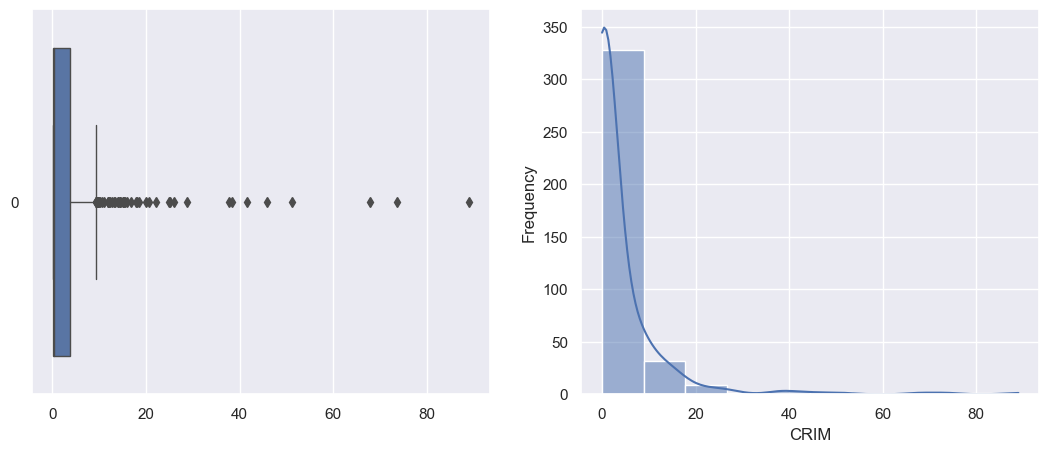

<Figure size 1300x500 with 0 Axes>

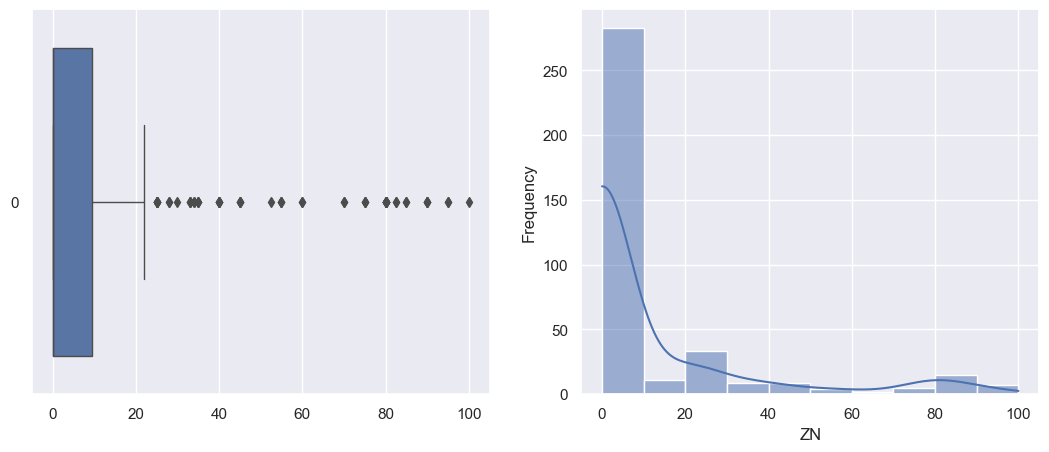

<Figure size 1300x500 with 0 Axes>

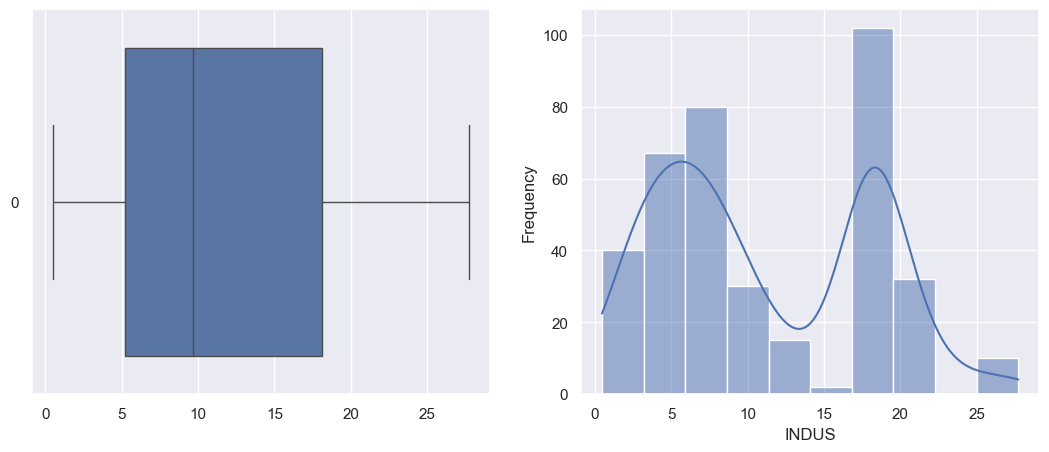

<Figure size 1300x500 with 0 Axes>

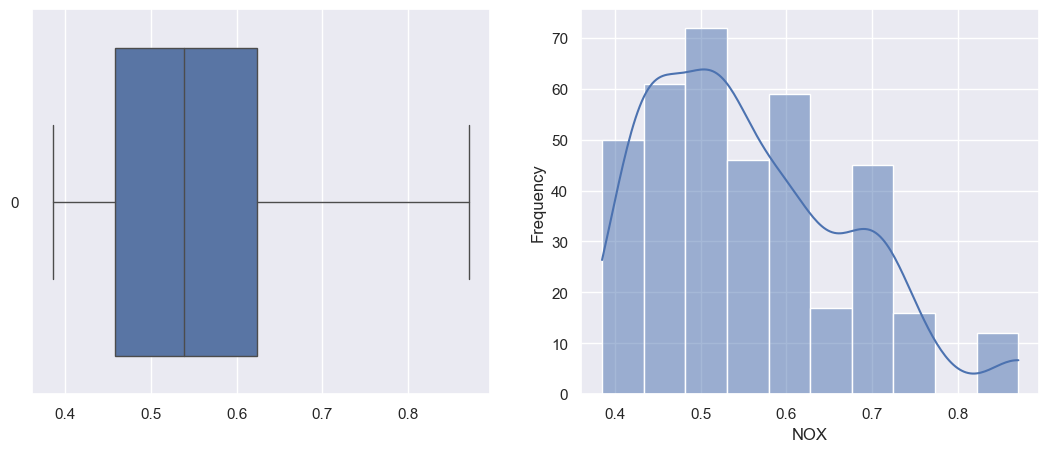

<Figure size 1300x500 with 0 Axes>

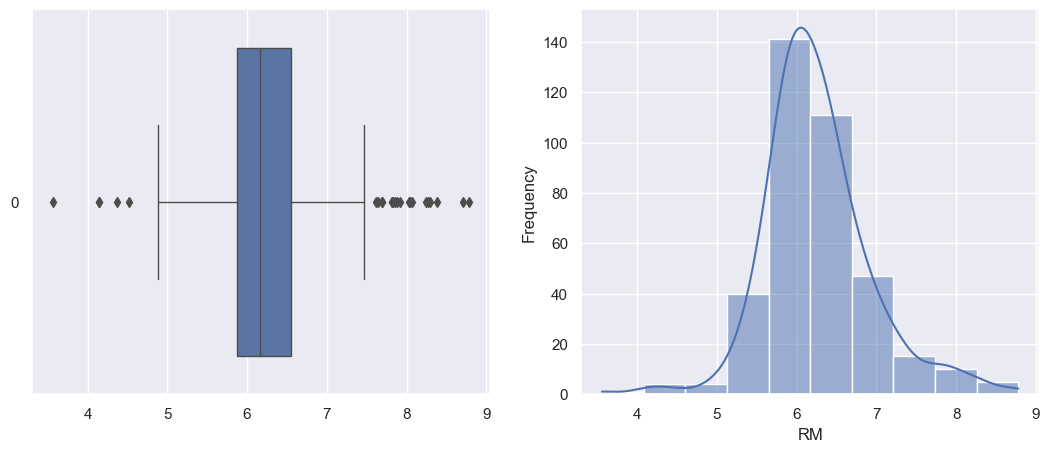

<Figure size 1300x500 with 0 Axes>

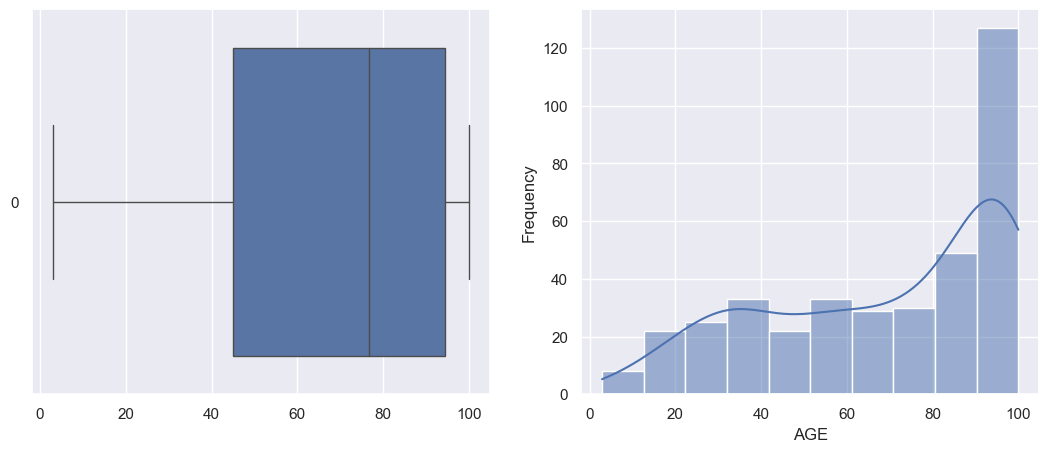

<Figure size 1300x500 with 0 Axes>

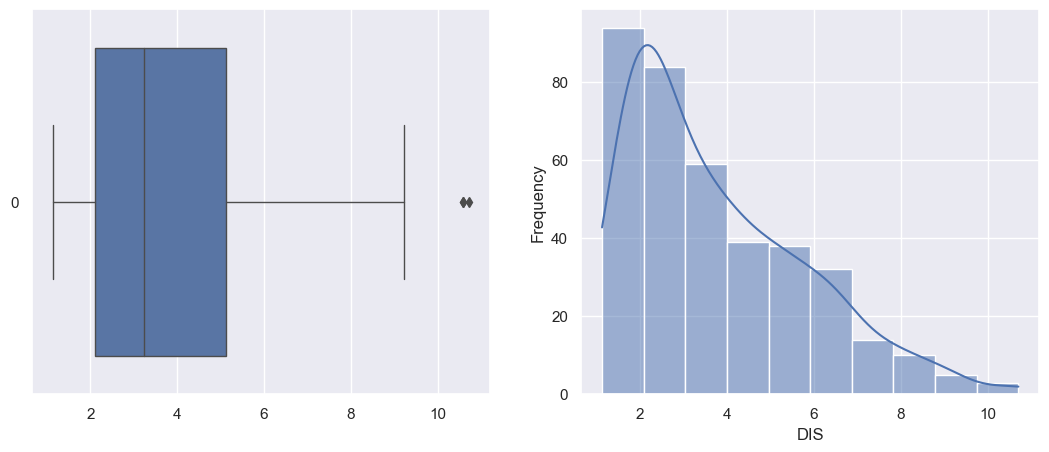

<Figure size 1300x500 with 0 Axes>

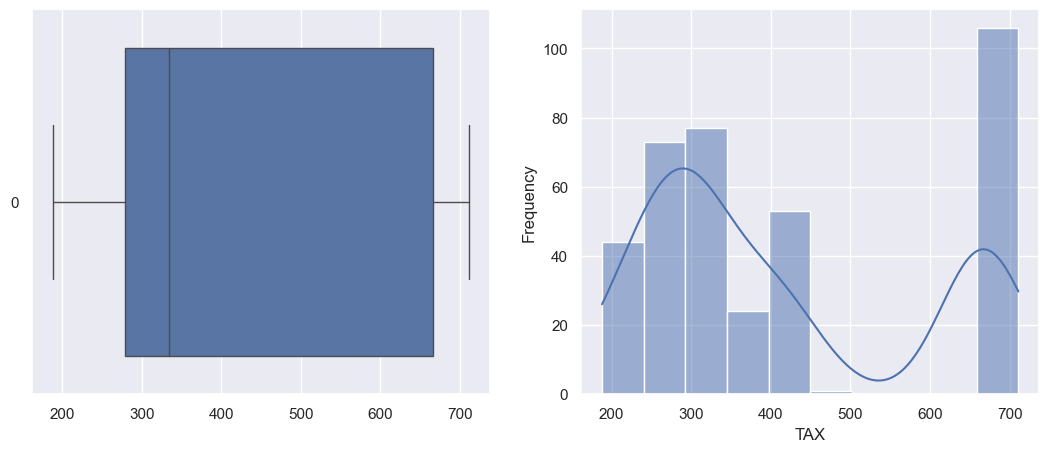

<Figure size 1300x500 with 0 Axes>

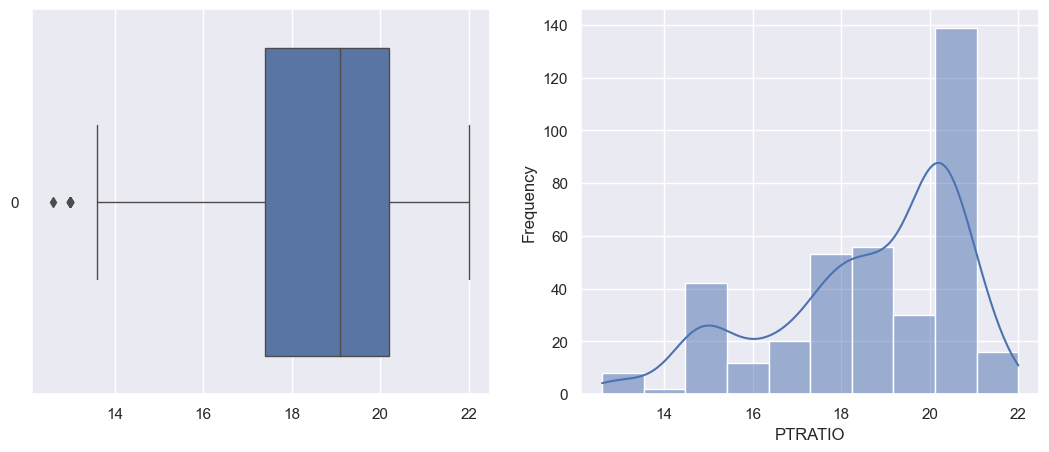

<Figure size 1300x500 with 0 Axes>

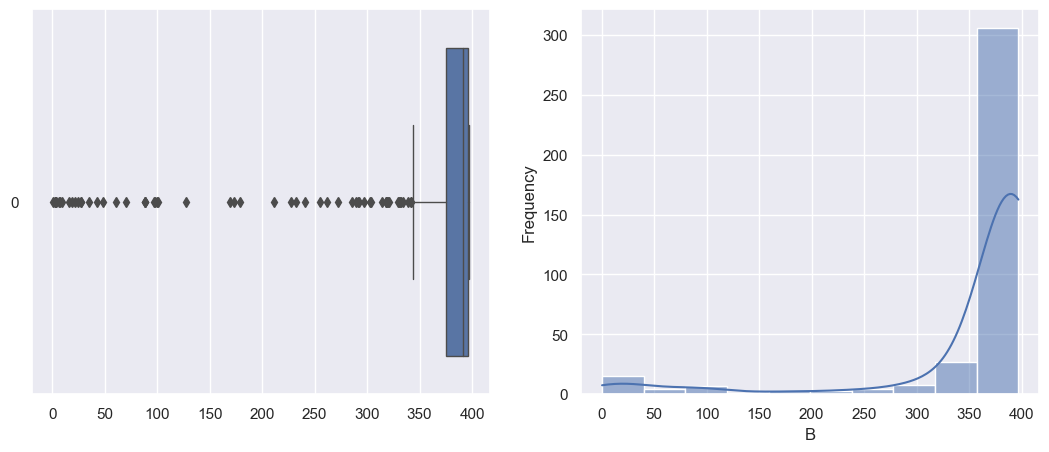

<Figure size 1300x500 with 0 Axes>

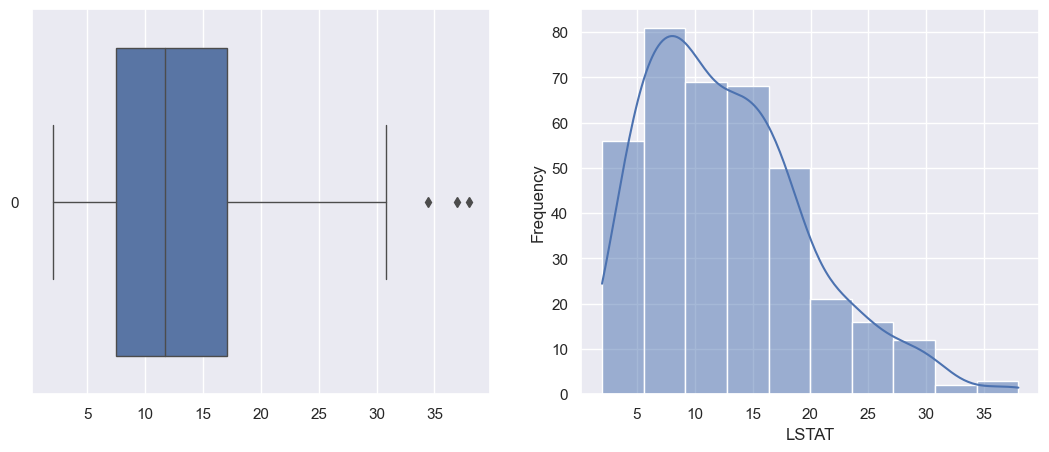

In [221]:
#Ninguna de las columnas sigue una distribución normal, ahora gráficamos para ver cuales tienen outlier:
    
for i in X_train[col_Xtrain].columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(13, 5)})
    f, (ax_box, ax_hist) = plt.subplots(1,2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(X_train[col_Xtrain][i],  ax=ax_box , linewidth= 1.0,orient='h')
    sns.histplot(X_train[col_Xtrain][i], ax=ax_hist , bins = 10,kde=True)


> Atributos con outliers: CRIM,ZN,RM,DIS,PTRATIO,B,LSTAT **Se aplica RobustScaler**

> Atributos sin outliers: INDUS,NOX,AGE,TAX. **Se aplica MinMaxSCaler** 

> El atributo RAD puede descomponerse en una columna dummie. Debido a que tiene un orden númerico (1,2,3...).

> CHAS: ya esta escalado [0,1].


In [224]:
#Creamos una copia para tener un data frame con las transformaciones

X_train_trans= X_train.copy()

In [234]:
from sklearn import preprocessing

columnsRobust = ['CRIM','ZN','RM','DIS','PTRATIO','B','LSTAT']
scaler = preprocessing.RobustScaler().fit(X_train_trans[columnsRobust])
X_train_trans[columnsRobust] = scaler.transform(X_train_trans[columnsRobust])

columnsNorm = ['INDUS','NOX','AGE','TAX']
scaler = preprocessing.MinMaxScaler().fit(X_train_trans[columnsNorm])
X_train_trans[columnsNorm] = scaler.transform(X_train_trans[columnsNorm])

In [ ]:
#One Hot Encoding para la columna RAD
X_train_trans = pd.get_dummies(data = X_train_trans, columns= ['RAD'])

In [240]:
#Finalmente tenemos las columnas transformadas, en escala y con dummies.
X_train_trans

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
285,-0.064441,8.533333,0.047654,0,0.000000,0.098711,0.294542,1.939301,0.101338,-0.321429,-2.329395,0.124256,True,False,False,False,False,False,False,False,False
129,0.022731,0.000000,0.785557,0,0.491770,0.434622,0.988671,-0.371537,0.476099,0.750000,0.171014,0.090085,False,False,False,True,False,False,False,False,False
504,-0.056888,0.000000,0.420455,0,0.386831,-0.195948,0.802266,-0.243409,0.162524,0.678571,0.258042,-0.398654,True,False,False,False,False,False,False,False,False
227,0.011340,0.000000,0.210411,0,0.244856,2.243831,0.145211,0.045035,0.227533,-0.607143,-0.649199,-0.808698,False,False,False,False,False,False,False,True,False
40,-0.035115,0.000000,0.236437,0,0.129630,0.894291,0.000000,0.822685,0.086042,-0.428571,-0.279565,-0.713435,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,3.487456,0.000000,0.646628,0,0.401235,-0.662983,0.554068,-0.137758,0.913958,0.392857,0.258042,0.313746,False,False,False,False,False,False,False,False,True
89,-0.057043,0.000000,0.108138,0,0.213992,0.374217,0.650875,-0.048715,0.156788,-0.464286,0.037197,-0.302356,False,True,False,False,False,False,False,False,False
66,-0.054037,1.333333,0.205645,0,0.049383,-0.419890,0.190525,1.080299,0.300191,-0.071429,0.225757,-0.375874,False,False,False,True,False,False,False,False,False
332,-0.055958,0.000000,0.173387,0,0.267490,0.225414,0.362513,1.067172,0.068834,0.392857,-0.078372,-0.626456,False,False,False,False,True,False,False,False,False


> Ya no existe una columna RAD, se han convertido a dummies.


# Exercici 3
Resumeix les noves columnes generades de manera estadística i gràfica

In [246]:
X_train_trans.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
count,378.00,378.00,378.00,378.00,378.00,378.00,378.00,378.00,378.00,378.00,378.00,378.00
mean,0.98,1.16,0.40,0.07,0.35,0.14,0.68,0.18,0.43,-0.19,-1.68,0.12
std,2.57,2.48,0.25,0.26,0.24,0.99,0.29,0.68,0.33,0.75,4.35,0.72
min,-0.07,0.00,0.00,0.00,0.00,-3.83,0.00,-0.70,0.00,-2.32,-18.30,-1.01
25%,-0.05,0.00,0.17,0.00,0.15,-0.43,0.43,-0.38,0.17,-0.61,-0.78,-0.44
50%,-0.00,0.00,0.34,0.00,0.31,-0.00,0.76,-0.00,0.28,0.00,0.00,0.00
75%,0.95,1.00,0.65,0.00,0.49,0.57,0.94,0.62,0.91,0.39,0.22,0.56
max,24.14,10.67,1.00,1.00,1.00,3.86,1.00,2.48,1.00,1.04,0.26,2.72


> Se puede observar que los valores están en una escala más cercana, por ejemplo la media [-1,1.61]

### Representación gráfica de las nuevas columnas transformadas

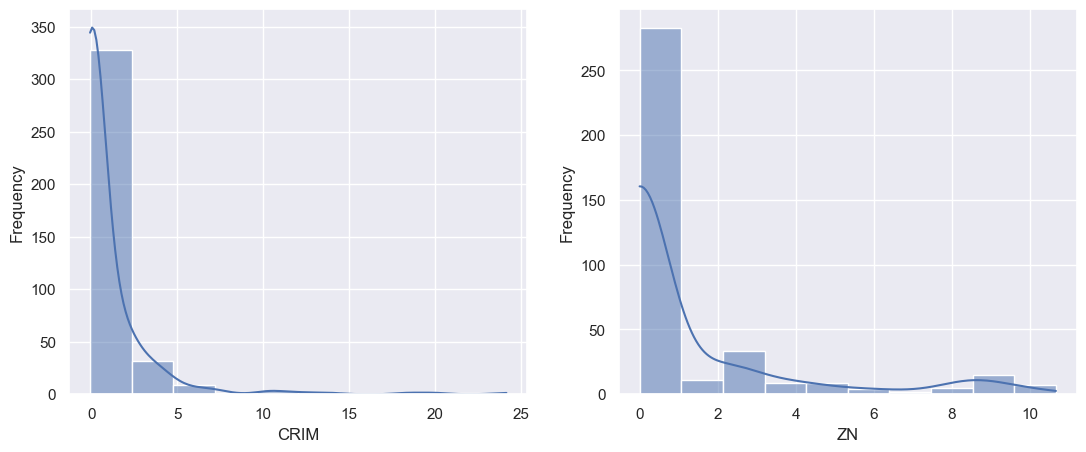

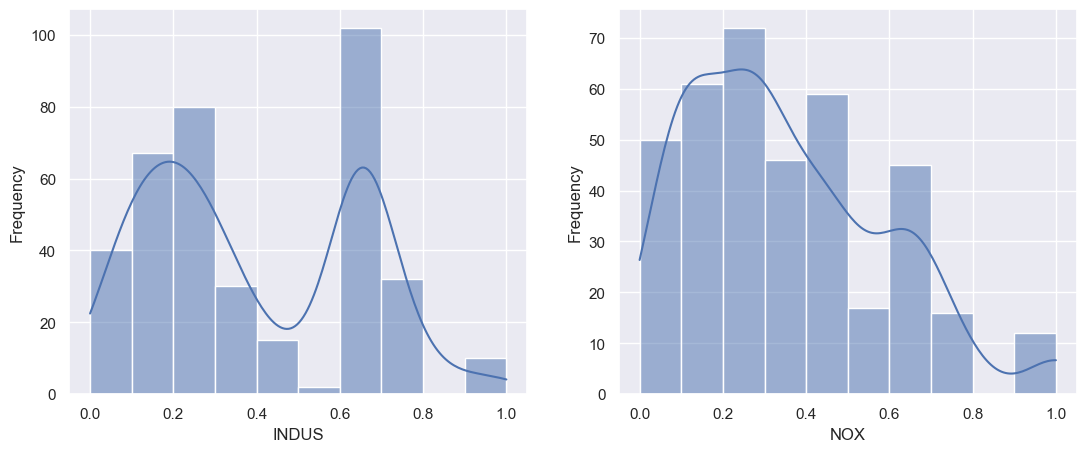

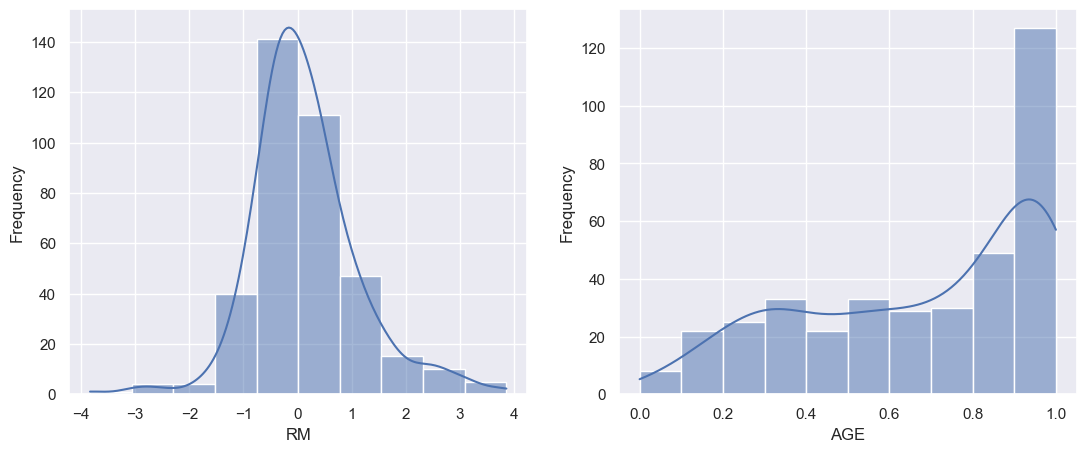

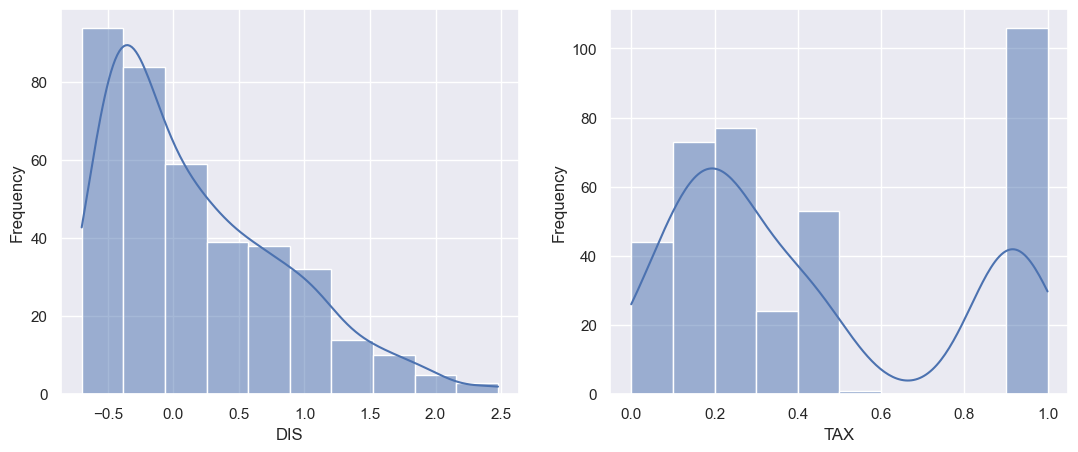

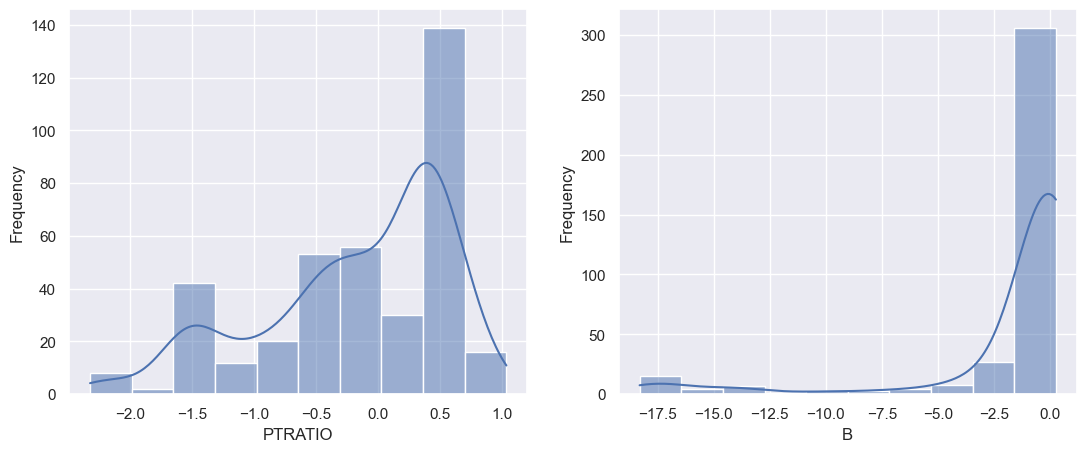

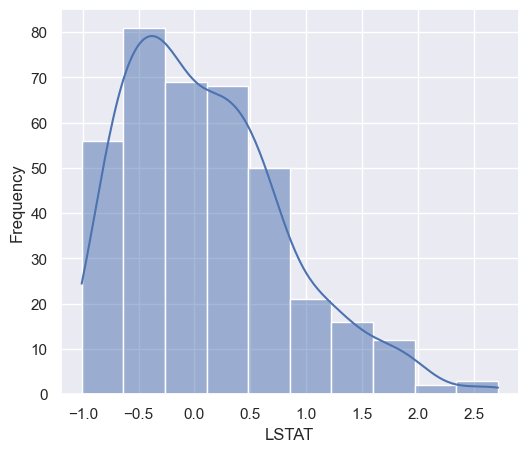

In [256]:
for i in range(0, len(X_train_trans[col_Xtrain].columns), 2):
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(13, 5)})
    
    # Primer subplot
    plt.subplot(1, 2, 1)
    plt.gca().set(xlabel=X_train_trans[col_Xtrain].columns[i], ylabel='Frequency')
    sns.histplot(X_train_trans[col_Xtrain][X_train_trans[col_Xtrain].columns[i]], bins=10, kde=True)
    
    # Segundo subplot
    if i+1 < len(X_train_trans[col_Xtrain].columns):
        plt.subplot(1, 2, 2)
        plt.gca().set(xlabel=X_train_trans[col_Xtrain].columns[i+1], ylabel='Frequency')
        sns.histplot(X_train_trans[col_Xtrain][X_train_trans[col_Xtrain].columns[i+1]], bins=10, kde=True)


> Se puede observar como las escalas en el eje X estan más cercanas

#### Por último realizamos una gráfica de la columna de las dummies, para conocer el % que hay de cada una 

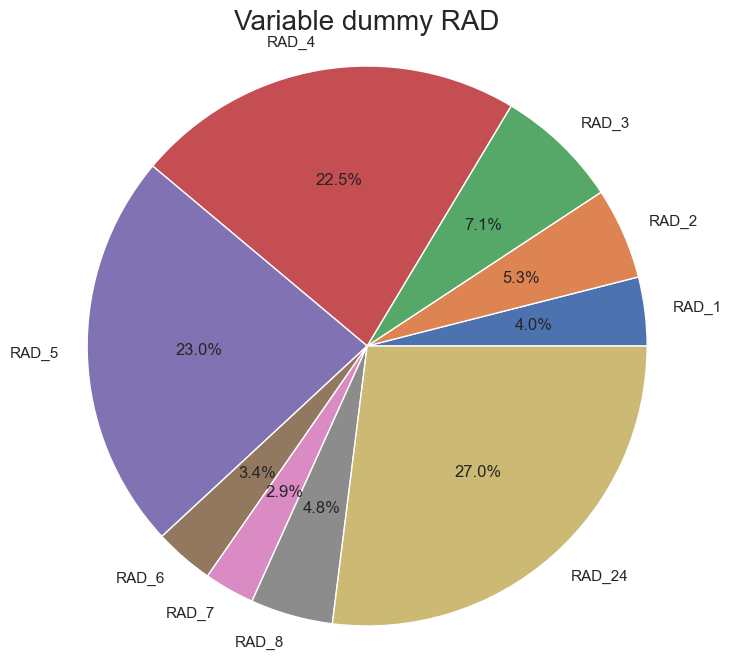

In [286]:
rad_counts = []
lista_col=[]
for col in X_train_trans.columns:
    if col.startswith('RAD_'):
        rad_counts.append(X_train_trans[col].value_counts()[1])
        lista_col.append(col)

plt.figure(figsize=(9, 8))
plt.pie(rad_counts, labels=lista_col, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Variable dummy RAD',size=20)
plt.show()


> La variable dummy RAD tiene 72% de sus datos distribuidos en RAD_4,RAD_5 y RAD_24. Muy cercano a un Pareto (donde el 80% de los datos estan en el 20% de sus observaciones).